<a href="https://colab.research.google.com/github/adv555/DataScience/blob/main/Hw2_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd

# Часть третья: Анализ датасет c Kaggle.com

В этой части домашней работы мы еще больше углубимся в библиотеку pandas и рассмотрим более продвинутые функции.

Для этого упражнения мы используем данные по Топ-50 рейтингу самых продаваемых книг на Amazon за 11 лет (с 2009 по 2019). Датасет находится в открытом доступе на [Kaggle.com](https://www.kaggle.com/datasets/sootersaalu/amazon-top-50-bestselling-books-2009-2019). Загрузите csv файл по ссылке и переместите его в ту же директорию, где находится ваш рабочий ноутбук (для удобства). После этого переходите к заданию

Для выполнения этой части домашнего задания, нужно будет не только написать код, но и ответить на сопутствующие вопросы. Там, где вы увидите выделенную жирным шрифтом надпись ответ:, нужно будет вставить вопрос в файл и ответ на него.

Проверьте у всех ли строк хватает данных: выведите количество пропусков (na) в каждом из столбцов (используйте функции isna и sum)

In [6]:
url = 'https://drive.google.com/file/d/1_8345ql1MxCyNnNjcFOn19BwreaoRuf9/view?usp=share_link'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
books = pd.read_csv(dwn_url)
books.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [7]:
books.shape

(550, 7)

In [8]:
books.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
books.head()

,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


## Первичное исследование данных

Проверьте у всех ли строк хватает данных: выведите количество пропусков (na) в каждом из столбцов (используйте функции isna и sum)

In [9]:
books.isna().sum()

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

**Ответ:** Есть ли в каких либо переменных пропуски?
<font color='green' >Нет</font>

Проверьте, какие есть уникальные значения в колонке genre (используйте функцию unique)

In [10]:
books['genre'].unique()

array(['Non Fiction', 'Fiction'], dtype=object)


---
**Ответ:** Какие есть уникальные жанры?

*   <font color='green'>Non Fiction,</font>
*   <font color='green'>List item</font>

Теперь посмотрите на распределение цен: постройте диаграмму (используйте kind='hist')

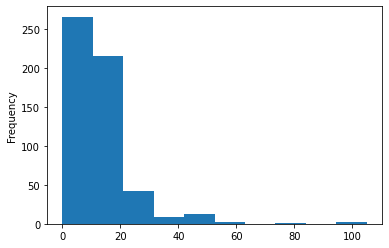

In [11]:
books['price'].plot(kind='hist')

Определите, какая цена у нас максимальная, минимальная, средняя, медианная (используйте функции max, min, mean, median)

In [12]:
books.price.describe()

count    550.000000
mean      13.100000
std       10.842262
min        0.000000
25%        7.000000
50%       11.000000
75%       16.000000
max      105.000000
Name: price, dtype: float64

In [13]:
books.price.median()

11.0


---

* **Ответ:** Mаксимальная цена? <font color='green'>105.00</font>
* **Ответ:** Минимальная цена? <font color='green'>0.00</font>
* **Ответ:** Средняя цена?     <font color='green'>13.10</font>
* **Ответ:** Медианная цена?   <font color='green'>11.00</font>



## Поиск и сортировка данных

In [14]:
books.user_rating.describe()

count    550.000000
mean       4.618364
std        0.226980
min        3.300000
25%        4.500000
50%        4.700000
75%        4.800000
max        4.900000
Name: user_rating, dtype: float64

In [15]:
books.head()

,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [16]:
max_rating = books.user_rating.max()
print('Какой рейтинг в датасете наивысший? Ответ: ', max_rating)

Какой рейтинг в датасете наивысший? Ответ:  4.9


In [17]:
max_rating_summary = books[books.user_rating == max_rating].shape[0]
print('Сколько книг имеют такой рейтинг?  Ответ: ', max_rating_summary)

Сколько книг имеют такой рейтинг?  Ответ:  52


In [18]:
max_reviews = books['reviews'].max()
book_max_reviews = books[books.reviews == max_reviews].name
print('У какой книги больше всего отзывов? Ответ:\n', book_max_reviews, max_reviews )

У какой книги больше всего отзывов? Ответ:
 534    Where the Crawdads Sing
Name: name, dtype: object 87841


In [19]:
# books[(books['year'] == 2015) & (books['user_rating'] == max_rating)]
books_2015_top_50 = books[books['year']==2015].sort_values(by='user_rating', ascending=False ).head(50)
max_price = books_2015_top_50['price'].max()
book = books_2015_top_50[books_2015_top_50['price'] == max_price].name

print('Из тех книг, что попали в Топ-50 в 2015 году, какая книга самая дорогая (можно использовать промежуточный датафрейм)?\nОтвет: ', f"Book: {book} - Price: ${max_price}" )

Из тех книг, что попали в Топ-50 в 2015 году, какая книга самая дорогая (можно использовать промежуточный датафрейм)?
Ответ:  Book: 277    Publication Manual of the American Psychologic...
Name: name, dtype: object - Price: $46


In [20]:
books_2010_top_50 = books[(books['genre'] == 'Fiction') & (books['year'] == 2010)].head(50)
books_with_max_rating = books_2010_top_50[books_2010_top_50['user_rating'] == max_rating].shape[0]

print('Сколько книг жанра Fiction попали в Топ-50 в 2010 году (используйте &)?\nОтвет: ', books_with_max_rating)

Сколько книг жанра Fiction попали в Топ-50 в 2010 году (используйте &)?
Ответ:  0


In [43]:
books_top_rate = books[(books['year'].isin([2010,2011])) & (books['user_rating'] == max_rating)].shape[0]

print('Сколько книг c рейтингом 4.9 попало в рейтинг в 2010 и 2011 годах (используйте | или функцию isin)? Ответ: ', books_top_rate)

Сколько книг c рейтингом 4.9 попало в рейтинг в 2010 и 2011 годах (используйте | или функцию isin)? Ответ:  1


* Какой рейтинг в датасете наивысший? **Ответ:** <font color='green'>4.9</font>

* Сколько книг имеют такой рейтинг? **Ответ:** <font color='green'>52</font>

* У какой книги больше всего отзывов? **Ответ:** <font color='green'>Where the Crawdads Sing - 87841 </font>

* Из тех книг, что попали в Топ-50 в 2015 году, какая книга самая дорогая (можно использовать промежуточный датафрейм)? **Ответ:**
<font color='green'>Publication Manual of the American Psychologic..</font>

* Сколько книг жанра Fiction попали в Топ-50 в 2010 году (используйте &)? **Ответ:**  <font color='green'>0</font>

* Сколько книг c рейтингом 4.9 попало в рейтинг в 2010 и 2011 годах (используйте | или функцию isin)? **Ответ:**  <font color='green'>1</font>


---

  И напоследок, давайте отсортируем по возрастанию цены все книги, которые
попали в рейтинг в 2015 году и стоят дешевле 8 долларов (используйте функцию sort_values).

In [140]:
sorted_books_2015 = books[(books['year'] == 2015) & (books['price'] < 8)].sort_values(by='price')
sorted_books_2015.head()

,name,author,user_rating,reviews,price,year,genre
507,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2015,Fiction
210,Laugh-Out-Loud Jokes for Kids,Rob Elliott,4.6,6990,4,2015,Non Fiction
206,Knock-Knock Jokes for Kids,Rob Elliott,4.5,3673,4,2015,Non Fiction
111,First 100 Words,Roger Priddy,4.7,17323,4,2015,Non Fiction
123,Giraffes Can't Dance,Giles Andreae,4.8,14038,4,2015,Fiction


In [57]:
last_in_sorted_book_name = sorted_books_2015.iloc[-1:].name
last_in_sorted_book_name

253    Old School (Diary of a Wimpy Kid #10)
Name: name, dtype: object

* Какая книга последняя в отсортированном списке? **Ответ:**  <font color='green'>Old School (Diary of a Wimpy Kid<font/>

## Агрегирование данных и соединения таблиц

---



---



Для начала давайте посмотрим на максимальную и минимальную цены для каждого из жанров (используйте функции groupby и agg, для подсчета минимальных и максимальных значений используйте max и min). Не берите все столбцы, виберете только нужные вам

In [62]:
books.groupby('genre').agg({'price': ['max', 'min']})

price    
              max min
genre                
Fiction        82   0
Non Fiction   105   0



1.   Максимальная цена для жанра Fiction: **Ответ:** 82
2.   Минимальная цена для жанра Fiction: **Ответ:** 0
3.   Максимальная цена для жанра Non Fiction: **Ответ:** 105
4.   Минимальная цена для жанра Non Fiction: **Ответ:** 0




---

Теперь создайте **новый датафрейм**, который будет вмещать в себя количество книг для каждого из авторов (используйте функции groupby и agg, для подсчета количества используйте count). Не берите все столбцы, виберете только нужные

In [99]:
author_books = (books.groupby('author').agg('name').count())
author_books

author
Abraham Verghese              2
Adam Gasiewski                1
Adam Mansbach                 1
Adir Levy                     1
Admiral William H. McRaven    1
                             ..
Walter Isaacson               3
William Davis                 2
William P. Young              2
Wizards RPG Team              3
Zhi Gang Sha                  2
Name: name, Length: 248, dtype: int64

In [141]:
author_books.shape

print('Какой размерности вышла таблица? Ответ: ',author_books.shape)

Какой размерности вышла таблица? Ответ:  (248,)


In [104]:
author_books.nlargest(1)


author
Jeff Kinney    12
Name: name, dtype: int64

1.   У какого автора больше всего книг? **Ответ:** **<font color='green'>Jeff Kinney</font>**
2.   Сколько книг у этого автора? **Ответ:** **<font color='green'>12</font>**


---

Теперь создайте **второй датафрейм**, который будет вмещать средний рейтинг для каждого автора (используйте функции groupby и agg, для подсчета среднего значения используйте mean). Не берите все столбцы, виберете только нужные

In [130]:
authors_avg_rate = books.groupby('author').agg('user_rating').mean().round(2)
authors_avg_rate

author
Abraham Verghese              4.60
Adam Gasiewski                4.40
Adam Mansbach                 4.80
Adir Levy                     4.80
Admiral William H. McRaven    4.70
                              ... 
Walter Isaacson               4.57
William Davis                 4.40
William P. Young              4.60
Wizards RPG Team              4.80
Zhi Gang Sha                  4.60
Name: user_rating, Length: 248, dtype: float64

In [136]:
author_with_min_avg_rate = authors_avg_rate.nsmallest(1)
author_with_min_avg_rate.index[0]

'Donna Tartt'

Ответ: У какого автора средний рейтинг минимальный? **Ответ:** **<font color='green'>Donna Tartt<font>**

In [139]:
author_with_min_avg_rate.values[0]

3.9

Ответ: Какой у этого автора средний рейтинг? Ответ: **<font color='green'>3.9</font>**

Соедините последние два датафрейма так, чтобы для каждого автора было видно количество книг и средний рейтинг (Используйте функцию concat с параметром axis=1). Сохраните результат в переменную

In [159]:
authors = pd.concat([author_books, authors_avg_rate],axis=1)
# authors.rename(columns={"name": "books"})

Отсортируйте датафрейм по возрастающему количеству книг и возрастающему рейтингу (используйте функцию sort_values)

In [154]:
sorted_authors = authors.sort_values('name',ascending=False)
sorted_authors

,name,user_rating
author,,
Jeff Kinney,12,4.80
Gary Chapman,11,4.74
Suzanne Collins,11,4.66
Rick Riordan,11,4.77
American Psychological Association,10,4.50
...,...,...
David Grann,1,4.60
Larry Schweikart,1,4.60
David McCullough,1,4.70


Какой автор первый в списке? **Ответ:** **<font color='green'>Jeff Kinney</font>**

In [158]:
sorted_authors[:1].index[0]

'Jeff Kinney'